# Dataset visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_PATH="BeijingPM_imputed.csv"

data=pd.read_csv(DATASET_PATH)
data.index=pd.DatetimeIndex(data["date"])

# These attributes are not suitable for visualization and analysis
excluded=["id","date","year","month","day","hour","season","cbwd"]

included=data.columns^excluded

data[included].describe()

,DEWP,HUMI,Iws,PM,PRES,TEMP,precipitation
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,2.074880,54.851057,23.261959,95.199947,1016.539347,12.587108,0.064677
std,14.221827,26.095286,49.280785,88.476615,10.304046,12.098323,0.855195
min,-40.000000,2.000000,0.450000,1.000000,991.000000,-19.000000,0.000000
25%,-10.000000,32.000000,1.790000,28.000000,1008.000000,2.000000,0.000000
50%,2.000000,55.000000,4.920000,70.000000,1016.000000,14.000000,0.000000
75%,15.000000,78.000000,21.020000,132.000000,1025.000000,23.000000,0.000000
max,28.000000,100.000000,585.600000,500.000000,1046.000000,42.000000,69.200000


## Data value distribution

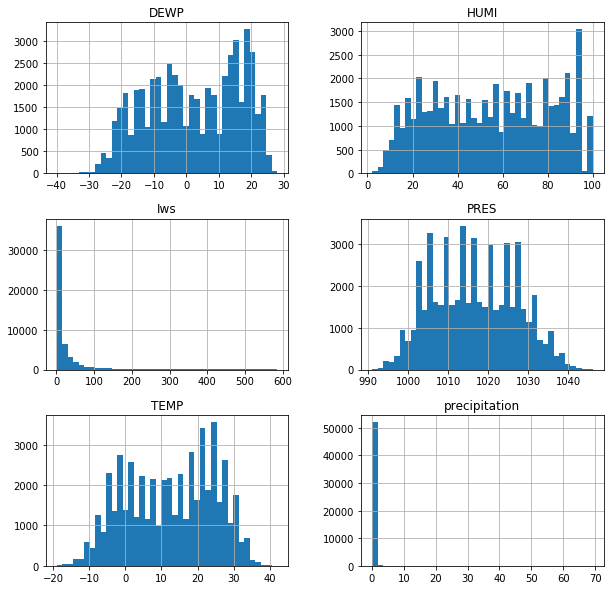

In [2]:
_=data.hist(bins=40,figsize=(10,10),column=included^["PM"])

(0, 500.0)

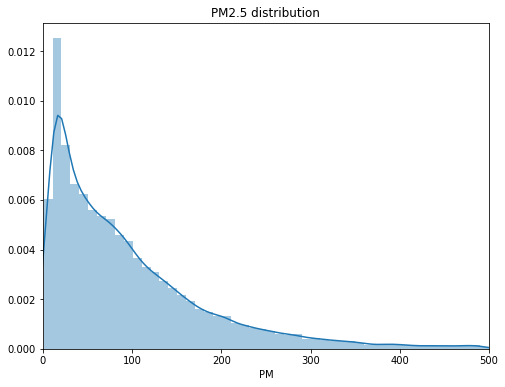

In [3]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data["PM"])
ax.set_title("PM2.5 distribution")
ax.set_xlim(0,data["PM"].max())

We can see that our PM2.5 approximately follows a pattern of exponential distribution, implying that Beijing has favorable air quality most of the time.

Text(0.5, 1, 'Correlation among attributes')

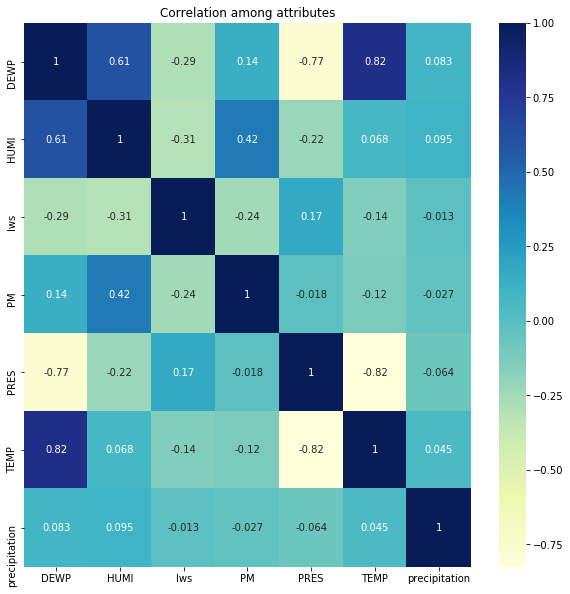

In [4]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data[included].corr(),annot=True,cmap="YlGnBu")
ax.set_title("Correlation among attributes")

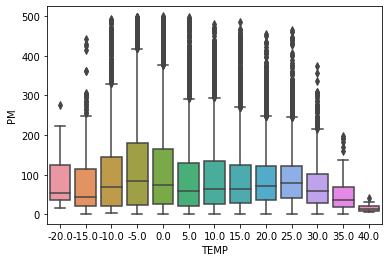

In [5]:
sns.boxplot(x=data["TEMP"]//5*5,y=data["PM"])

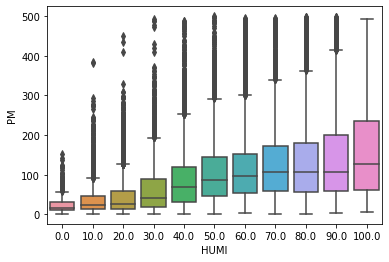

In [6]:
sns.boxplot(x=data["HUMI"]//10*10,y=data["PM"])